# Exercise 2
# Part I
## Generate a white noise process $\eta_i$
As a generator for normal distributed numbers you can use from the numpy library random.normal:  
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
mu = 0 
sigma = 5 
numbers = 499
eta = np.random.normal(loc=mu,scale=sigma,size=numbers)

## (ii) Derive the random walk process x and plot it
as $x_j = x_0 + \sum_i^n \eta_i$ and plot the process.  
with $x_0 = 0$

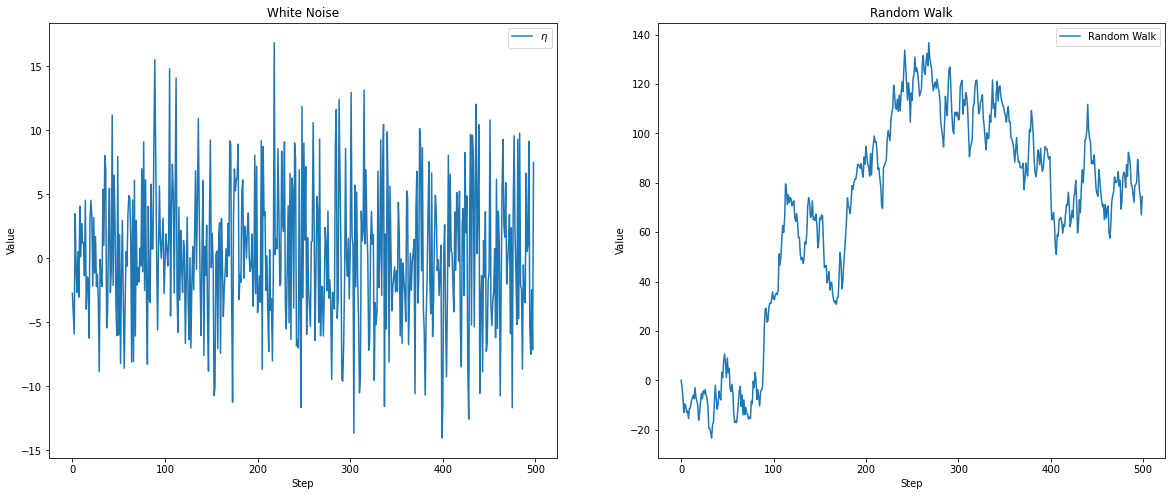

In [2]:
x_0 = 0
x = [x_0]
for i in range(499):
    x.append(x[i]+eta[i])


fig,axs = plt.subplots(1,2,figsize=(20,8))    
axs[0].plot(eta,label='$\eta$')
axs[0].set_title('White Noise')
axs[1].plot(x,label='Random Walk')
axs[1].set_title('Random Walk')

for ax in axs:
    ax.legend()
    ax.set_xlabel('Step')
    ax.set_ylabel('Value')
plt.show()


## (iii) Estimation of moments
In order to be able to estimate the moments, we need to generate a sample of
random walk processes (e.g. of size 500) and derive estimates of expectation
and variance at each time step.

In [3]:
samples = 100000
length = 100
mu = 0
sigma = 5
x0 = 0

expectation = np.zeros(length)
variance = np.zeros(length)

x = [x0 for s in range(samples)]
expectation[0] = np.mean(x)
variance[0] = np.var(x)

for l in range(1,length):
    eta = np.random.normal(loc=mu,scale=sigma,size=samples)
    x = [x[s] + eta[s] for s in range(samples)]
    variance[l] = np.var(x)
       
        

In [4]:
sample_size = np.arange(100,10000,100)
Means = np.zeros((len(sample_size),length))
Means[:,0] = x0
for idx,samples in enumerate(sample_size):
    x = [x0 for s in range(samples)]
    for l in range(1,length):
        eta = np.random.normal(loc=mu,scale=sigma,size=samples)
        x = [x[s] + eta[s] for s in range(samples)]
        Means[idx,l] = np.mean(x)  

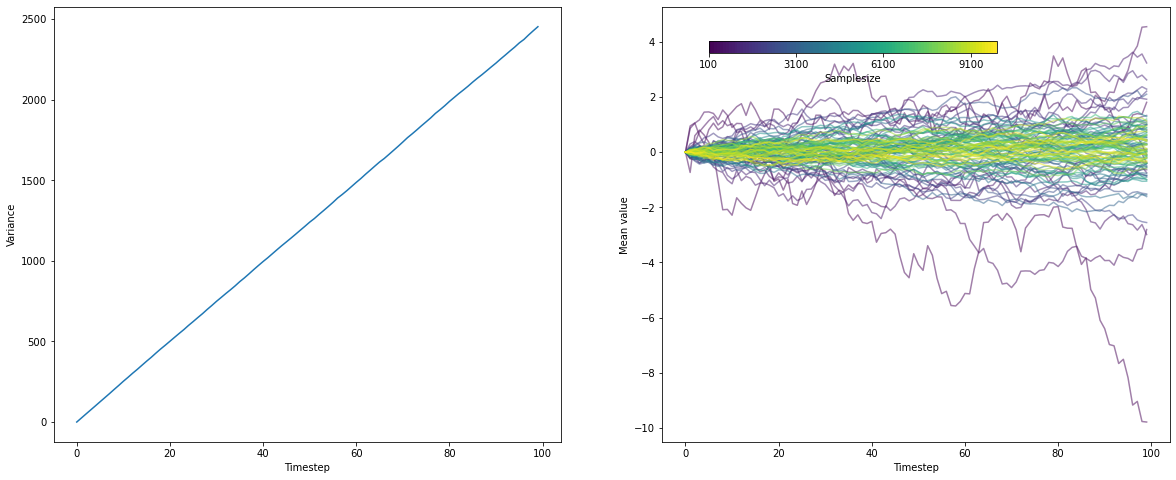

In [7]:
viridis = cm.get_cmap('viridis', len(sample_size))

fig,axs = plt.subplots(1,2,figsize=(20,8))

c_map_ax = fig.add_axes([0.58, 0.8, 0.2, 0.02])
c_map_ax.axes.get_yaxis().set_visible(False)

axs[0].plot(variance,label='Variance')
axs[0].set_ylabel('Variance')

for i in range(len(sample_size)):
    col_ix = i/len(sample_size) 
    axs[1].plot(Means[i,:],color=viridis(col_ix),alpha=.5)
axs[1].set_ylabel('Mean value')
    
for ax in axs:
    ax.set_xlabel('Timestep')

mpl.colorbar.ColorbarBase(c_map_ax, cmap=viridis, orientation = 'horizontal',ticks=sample_size[0::30],norm=mpl.colors.Normalize(100, 10000),
                         label='Samplesize')
plt.show()

# Part II (Homework)

## (i) Generate a stochastic process: temperature time series in K for months t in 1:nt, with nt=120

 $X[t] = alpha * ( X[t-1]-mu[t-1] ) + eta[t] + mu[t]$
 
 with $mu[t] = a0 + a1 * t + a2 * cos(2*pi*t/12) + a3 * sin(2*pi*t/12)$  
 
 choose for the modell:  
 $a0=283.15$  
 $a1=0.01$  
 $a2=10$   
 $a3=0.2$   
 $\alpha=0.2$  
 
 and for $\eta$:  
 $\mu=0$  
 $\sigma=5$

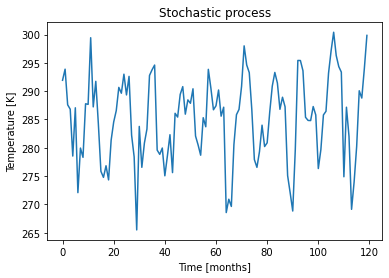

In [8]:
mu = 0
sigma = 5
length = 120
alpha = 0.2
a0 = 283.15
a1 = 0.01
a2 = 10
a3 = 0.2
a = [a0,a1,a2,a3]
time = np.arange(1,121)


eta = np.random.normal(mu,sigma,length)


def mu_t(a,time):
    return a[0] + a[1]*time + a[2]*np.cos((2*np.pi*time)/12) + a[3]*np.sin((2*np.pi*time)/12)

def x_t(alpha, eta, mu_time, time):
    x = np.zeros(len(time))
    x[0] = mu_time[0]
    for i in range(1,len(time)):
        x[i] = alpha * (x[i-1] - mu_time[i-1]) + eta[i] + mu_time[i]
    return x

mu_time = mu_t(a,time)
x=x_t(alpha,eta,mu_time,time) 


plt.plot(x)
plt.title('Stochastic process')
plt.xlabel('Time [months]')
plt.ylabel('Temperature [K]')
plt.show()

##  Estimate the parameter a0, a1, a2 and a3
Use the methods from exercise 1!  
Define h0 (offset), h1 (trend), h2 (cos) and h3 (sin)  
Build a matrix H and calculate $\vec{a}$ = $(H^TH)^{-1}H^T\vec{X}$ 

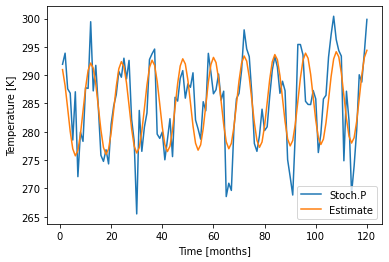

a_est0 =  283.7823  --> a0 =  283.15
a_est1 =  0.0207  --> a1 =  0.01
a_est2 =  8.1236  --> a2 =  10
a_est3 =  0.3285  --> a3 =  0.2


In [9]:
h0 = np.ones(len(time))
h1 = np.linspace(0,len(time),len(time))
h2 = np.cos((2*np.pi*time[:])/12)
h3 = np.sin((2*np.pi*time[:])/12)
H = np.array([h0,h1,h2,h3]).T


M = np.dot(np.linalg.inv(np.dot(H.T,H)),H.T)
a_est = np.dot(M,x)


estimate = a_est[0]*h0 + a_est[1]*h1 + a_est[2]*h2 + a_est[3]*h3
plt.plot(time,x,label='Stoch.P')
plt.plot(time,estimate,label='Estimate')
plt.xlabel('Time [months]')
plt.ylabel('Temperature [K]')
plt.legend(loc='lower right')
plt.show()

for i in range(len(a_est)):
    print('a_est'+str(i)+' = ',np.around(a_est[i],4),' --> a'+str(i)+' = ',a[i])

## (ii) Derive sample uncertainty as standard deviation of a estimates over sample of processes and compare this to the uncertainty as given by a linear modelling/linear regression function

Tip:  
Set the number of samples to 1000 and generate such many stochastic processes. For each sample calculate the the a0, a1, a2 and a3 with the method $\vec{a}$ = $(H^TH)^{-1}H^T\vec{X}$  and store them in a matrix A. You should end up haven 1000 of each a. Calculate the standard deviation for each a.  

As a given linear regression function you can use OLS from the library statsmodels.api

In [8]:
samples = 1000
A = np.zeros((samples,len(a)))


for s in range(samples):
    eta = np.random.normal(mu,sigma,length)
    x_sample=x_t(alpha,eta,mu_time,time)
    A[s,:] = np.dot(M,x_sample)
StD = [np.std(A[:,i]) for i in range(len(a))]    
Mean = [np.mean(A[:,i]) for i in range(len(a))]  

for i in range(len(a)):
    print('StD(a_est'+str(i)+'): ',StD[i])

StD(a_est0):  1.139860681322604
StD(a_est1):  0.01652922602696574
StD(a_est2):  0.7627450281423082
StD(a_est3):  0.7633915001609738


In [10]:
import statsmodels.api as sm

H2 = sm.add_constant(H)
estimate = sm.OLS(x, H2)
est_result = estimate.fit()
print(est_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     58.12
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           5.21e-23
Time:                        10:14:46   Log-Likelihood:                -364.26
No. Observations:                 120   AIC:                             736.5
Df Residuals:                     116   BIC:                             747.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        284.8732      0.931    305.843      0.0

In [11]:
for i in range(4):
    print('a'+str(i)+'_std_est = ',np.around(StD[i],3),' a'+str(i)+'_std_mod = ',np.round(est_result.bse[i],3))

a0_std_est =  1.14  a0_std_mod =  0.931
a1_std_est =  0.017  a1_std_mod =  0.013
a2_std_est =  0.763  a2_std_mod =  0.661
a3_std_est =  0.763  a3_std_mod =  0.663


Altough the function from the library just get one timeseries and not a sample i gives a quiet good estimation of the standard error for each of the coefficients a.  
Thus such libraries are a good tool to estimate these coefficients and their uncertainties.